## OBJECTIVE::
**TO IMPLEMENT   NIAVE BAYES MULTINOMIAL ALGORITHM  **

### 1.  USING BOW VERTORIZATION
### 2.   USING TFIDF VECTORIZATION 



## MULTINOMIAL IMPLEMENTATION WITH BOW VERTORIZATION

In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [34]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


# **spliiting the data into train and test data**

In [0]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [36]:
vectorizer=CountVectorizer()#building the vertorizer with word counts as weare dealing with multinomial MODEL  here
train_bow=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_bow.shape)

(80000, 28059)


In [37]:
test_bow=vectorizer.transform(x_test)#fitting the model on test data
print(test_bow.shape)

(20000, 28059)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 

In [39]:
#now,here biulding the multinomial  model by passing the class_prior as 0.5,0.5 as it highly imbalanced dataset
mb=naive_bayes.MultinomialNB(fit_prior=False, class_prior=[0.5,0.5])
tuned_parameters = [{'alpha':[10**-4,10**-3,10**-2,10**-1,0,10**1,10**2,10**3,10**4]}] #alpha value range to be used for gridsearchcv


#now  Using GridSearchCV
model = GridSearchCV(mb, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(train_bow, y_train)#fiitting the training data

print(model.best_estimator_)#printing the best_estimator
print(model.score(train_bow, y_train))#predicting  f1 score on test data


MultinomialNB(alpha=10, class_prior=[0.5, 0.5], fit_prior=False)
0.9487720052100818


In [40]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of alpha given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.072911,0.006320,0.919144,0.964464,0.0001,{'alpha': 0.0001},6,0.914665,0.976224,0.925891,...,0.912098,0.958732,0.922074,0.958025,0.921506,0.957399,0.028765,0.000557,0.005979,0.006132
1,0.068627,0.006312,0.919204,0.963333,0.001,{'alpha': 0.001},5,0.914120,0.974766,0.924982,...,0.913457,0.957578,0.922868,0.956812,0.921982,0.956116,0.029544,0.000917,0.006101,0.006127
2,0.066281,0.005938,0.917673,0.960688,0.01,{'alpha': 0.01},8,0.912469,0.971515,0.922025,...,0.912506,0.954742,0.920173,0.954347,0.922397,0.953689,0.029059,0.000222,0.006583,0.006020
3,0.067966,0.006263,0.916704,0.956255,0.1,{'alpha': 0.1},9,0.910867,0.970520,0.921702,...,0.908584,0.949319,0.919499,0.948203,0.920722,0.947904,0.029767,0.000513,0.008213,0.007455
4,0.066610,0.006354,0.918575,0.965679,0,{'alpha': 0},7,0.913750,0.977521,0.924512,...,0.916057,0.960067,0.919696,0.959335,0.921927,0.958631,0.030343,0.000496,0.005305,0.006090
5,0.066080,0.006078,0.942213,0.944715,10,{'alpha': 10},1,0.942793,0.939006,0.950195,...,0.940001,0.946902,0.938661,0.947739,0.937817,0.948685,0.028857,0.000577,0.003850,0.002846
6,0.065608,0.005930,0.941142,0.941473,100,{'alpha': 100},4,0.942793,0.936683,0.950195,...,0.937619,0.942340,0.934584,0.941809,0.937231,0.941083,0.028607,0.000447,0.004446,0.001852
7,0.065100,0.006210,0.941150,0.941488,1000,{'alpha': 1000},2,0.942793,0.936683,0.950195,...,0.937619,0.942359,0.934584,0.941835,0.937231,0.941114,0.027876,0.000617,0.004445,0.001857
8,0.062687,0.005697,0.941150,0.941488,10000,{'alpha': 10000},2,0.942793,0.936683,0.950195,...,0.937619,0.942359,0.934584,0.941835,0.937231,0.941114,0.023985,0.001076,0.004445,0.001857


[8.085611277862403, 8.079598651644249, 8.232742993822972, 8.329628510448483, 8.142518095805295, 5.778662439266002, 5.885765915742702, 5.8849942349506135, 5.8849942349506135]


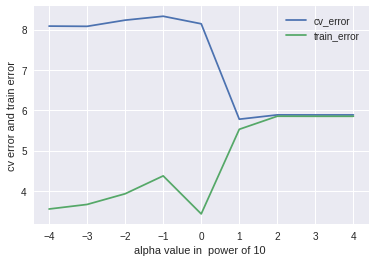

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt


mean_test_score=list(results['mean_test_score'])#taking mean_test_score values of various alpha into a list
mean_train_score=list(results['mean_train_score'])#taking mean_train_score values of varoius alpha into a list
cv_error_list=[]
train_error_list=[]
for i  in mean_test_score:
   i=1-i
   i=i*100
   cv_error_list.append(i)#appending the list with cv_error 
for i  in mean_train_score:
   i=1-i
   i=i*100
   train_error_list.append(i)#appending  the list with train_error     
    
print(cv_error_list)
alpha_values_in_10_power=[-4,-3,-2,-1,0,1,2,3,4]#list of alpha values in power of 10
plt.plot(alpha_values_in_10_power,cv_error_list,label='cv_error')#plotting alpha with cv_error
plt.plot(alpha_values_in_10_power,train_error_list,label='train_error')#plotting aplhawith train_error
plt.xlabel('alpha value in  power of 10 ')
plt.ylabel('cv error and train error')
plt.legend(loc='best')


**thus the best value of aplha is found to be 10 here as it is minimizing both train error and cv_error rate**

In [42]:
#now fitting the model again on train data to find the top important features for both positive and negative class
mb=naive_bayes.MultinomialNB(alpha=10,fit_prior=False,class_prior=[0.5,0.5])
mb.fit(train_bow,y_train)

MultinomialNB(alpha=10, class_prior=[0.5, 0.5], fit_prior=False)

In [43]:
vectorizer=CountVectorizer()#building the vertorizer with word counts as weare dealing with multinomial MODEL  here
train_bow=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_bow.shape)

(80000, 28059)


In [59]:
#getting the top most 10 features words for both +ve and-ve calss
negative_class_prob_sorted = mb.feature_log_prob_[0,:].argsort()#finding featues of negative class and sorting it and storing in variable
positive_class_prob_sorted = mb.feature_log_prob_[1,:].argsort()#finding featues of positive class and sorting it and storing in variable
print(np.take(vectorizer.get_feature_names(),positive_class_prob_sorted[28048:])) 
print(np.take(vectorizer.get_feature_names(),negative_class_prob_sorted[28048:]))

['coffe' 'tri' 'one' 'product' 'flavor' 'tea' 'tast' 'good' 'like' 'great'
 'love']
['good' 'order' 'box' 'buy' 'tri' 'flavor' 'would' 'one' 'product' 'like'
 'tast']


In [0]:
#above are the top features for negative and positive class without any alphabatically  sorted  order 

<h2>**IN THE FOLLOWING CELL ACCURACY OF THE MODEL IS TESTED ON TEST DATA USING F1_SCORE,PRECISION,RECALL,CONFUSION MATRIX  WITH BEST VALUE OF ALPHA **</h2>

Accuracy on test set: 88.695%
Precision on test set: 0.888
Recall on test set: 0.996
F1-Score on test set: 0.939
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



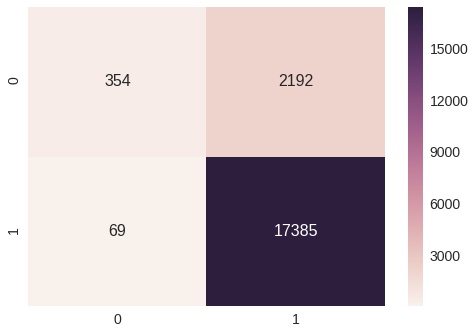

In [46]:
#Testing Accuracy on Test data  
import seaborn as sns #import seaborn
from sklearn.metrics import *#importing metrics from sklearn
mb=naive_bayes.MultinomialNB(alpha=10,fit_prior=False,class_prior=[0.5,0.5])#biudling the naive bayes  multinomial model
mb.fit(train_bow,y_train)#fitting the model
y_pred = mb.predict(test_bow) #predicting on test data
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size/
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# ***TFIDF VECTORIZATION WITH MULTINOMIAL NAIVE BAYES ALGORITHM***

In [47]:
vectorizer=TfidfVectorizer()#building the tfidf vertorizer with word counts as weare dealing with multinomial here
train_bow=vectorizer.fit_transform(x_train)#fitting and transforming the model on training data
print(train_bow.shape)

(80000, 28059)


In [48]:
test_bow=vectorizer.transform(x_test)#fitting the model on test data
print(test_bow.shape)

(20000, 28059)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 

In [50]:
#now,here biulding the multinomial  model 
mb=naive_bayes.MultinomialNB()
tuned_parameters = [{'alpha':[10**-4,10**-3,10**-2,10**-1,0,10**1,10**2,10**3,10**4]}] #alpha value range to be used for gridsearchcv


#now  Using GridSearchCV
model = GridSearchCV(mb, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(train_bow, y_train)#fiitting the training data

print(model.best_estimator_)#printing the best_estimator
print(model.score(train_bow, y_train))#predicting  f1 score on test data


MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
0.9640960877771894


*thus the best parameter is alpha=0.01*

In [51]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of alpha given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.064270,0.005545,0.944715,0.973267,0.0001,{'alpha': 0.0001},4,0.945123,0.986689,0.950311,...,0.944238,0.968261,0.941876,0.967498,0.943117,0.966448,0.023994,0.000458,0.003173,0.006070
1,0.063023,0.005482,0.945178,0.972840,0.001,{'alpha': 0.001},2,0.945463,0.986310,0.951552,...,0.944379,0.967843,0.942558,0.967006,0.944198,0.965998,0.026661,0.000240,0.003325,0.006086
2,0.062953,0.005649,0.945771,0.971311,0.01,{'alpha': 0.01},1,0.945321,0.984115,0.952861,...,0.944745,0.966775,0.944449,0.965894,0.944539,0.964932,0.026032,0.000531,0.003163,0.005670
3,0.061800,0.005399,0.945110,0.963034,0.1,{'alpha': 0.1},3,0.943415,0.961697,0.951925,...,0.946168,0.962450,0.942982,0.961840,0.942271,0.960811,0.026209,0.000337,0.003372,0.001316
4,0.061664,0.005398,0.943584,0.973684,0,{'alpha': 0},5,0.944285,0.987145,0.948740,...,0.942083,0.968614,0.940862,0.967844,0.941681,0.966883,0.025311,0.000177,0.002983,0.006123
5,0.062752,0.005345,0.941242,0.941586,10,{'alpha': 10},6,0.942793,0.936916,0.950195,...,0.937696,0.942484,0.934584,0.941937,0.937231,0.941199,0.027114,0.000205,0.004465,0.001812
6,0.063551,0.005324,0.941242,0.941594,100,{'alpha': 100},6,0.942793,0.936916,0.950195,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.025164,0.000227,0.004465,0.001813
7,0.063994,0.005253,0.941242,0.941594,1000,{'alpha': 1000},6,0.942793,0.936916,0.950195,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.026847,0.000211,0.004465,0.001813
8,0.059235,0.005098,0.941242,0.941594,10000,{'alpha': 10000},6,0.942793,0.936916,0.950195,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.025341,0.000614,0.004465,0.001813


[5.528490831314725, 5.482185028527054, 5.422896353755712, 5.489021881329659, 5.641619234621031, 5.875761377222, 5.875761377222, 5.875761377222, 5.875761377222]


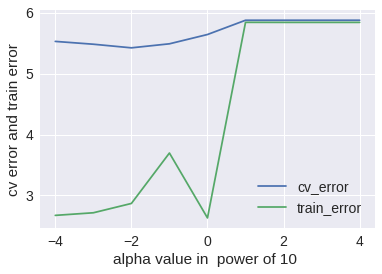

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt


mean_test_score=list(results['mean_test_score'])#taking mean_test_score values of various alpha into a list
mean_train_score=list(results['mean_train_score'])#taking mean_train_score values of varoius alpha into a list
cv_error_list=[]
train_error_list=[]
for i  in mean_test_score:
   i=1-i
   i=i*100
   cv_error_list.append(i)#appending the list with cv_error 
for i  in mean_train_score:
   i=1-i
   i=i*100
   train_error_list.append(i)#appending  the list with train_error     
    
print(cv_error_list)
alpha_values_in_10_power=[-4,-3,-2,-1,0,1,2,3,4]#list of alpha values in power of 10
plt.plot(alpha_values_in_10_power,cv_error_list,label='cv_error')#plotting alpha with cv_error
plt.plot(alpha_values_in_10_power,train_error_list,label='train_error')#plotting aplhawith train_error
plt.xlabel('alpha value in  power of 10 ')
plt.ylabel('cv error and train error')
plt.legend(loc='best')

<h2>from above visualization best value of alpha is found to be 0.01</h2>

In [53]:
#now fitting the model again on train data to find the top important features for both positive and negative class
mb=naive_bayes.MultinomialNB(alpha=0.01)
mb.fit(train_bow,y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [54]:
#getting the top most 10 features words for both +ve and-ve calss
negative_class_prob_sorted = mb.feature_log_prob_[0, :].argsort()#finding featues of negative class and sorting it and storing in variable
positive_class_prob_sorted = mb.feature_log_prob_[1, :].argsort()#finding featues of positive class and sorting it and storing in variable

print(np.take(vectorizer.get_feature_names(), negative_class_prob_sorted[28048:]))#printing the top 10 featues of negative class
print(np.take(vectorizer.get_feature_names(), positive_class_prob_sorted[28048:]))#printing the top 10 features of positive class 


['dog' 'tri' 'buy' 'order' 'tea' 'one' 'flavor' 'would' 'product' 'like'
 'tast']
['tri' 'use' 'one' 'product' 'flavor' 'like' 'tast' 'good' 'love' 'great'
 'tea']


Accuracy on test set: 94.115%
Precision on test set: 0.938
Recall on test set: 0.999
F1-Score on test set: 0.967
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



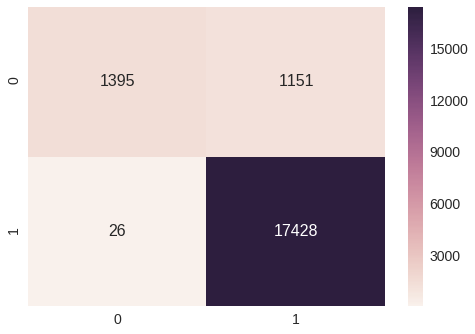

In [55]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
mb=naive_bayes.MultinomialNB(alpha=0.01)#building the model
mb.fit(test_bow,y_test)
y_pred = mb.predict(test_bow) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


In [0]:
#from above confusion matrix recall,precision,f1_score can be easily visualized

<h1>OBSERVATIONS</h1>



1.   **best value of alpha is 10 for bow vectorization with f1_score of 94% ..plotted with confusion matrix**
2.   ** best value of alpha is 0.01 for tfidf vectorization with f1_score of 96% plotted with confusion matrix**



In [0]:
#####END OF ASSIGNMENT###############